In [24]:
import argparse
import os
import sys
import numpy as np
import pandas as pd

import torch
import matplotlib.pyplot as plt   

sys.path.append('/user_data/mmhender/featsynth/code/')
sys.path.insert(0, '/user_data/mmhender/featsynth/code/')

from utils import things_utils

import PIL

In [19]:
things_stim_path = '/user_data/mmhender/stimuli/things/'

fn2load = os.path.join(things_stim_path, 'things_file_info.npy')
tfiles = np.load(fn2load, allow_pickle=True).item()

In [20]:
ecoset_info_path = '/user_data/mmhender/stimuli/ecoset_info/'

fn = os.path.join(ecoset_info_path, 'categ_use_ecoset.npy')
info = np.load(fn, allow_pickle=True).item()
basic_names = list(info['binfo'].keys())

In [21]:
# layers = ['relu1_1', 'pool1','pool2','pool3','pool4']    
layers = ['pool1','pool2','pool3','pool4']    
n_layers = len(layers)

In [22]:
stim_path = '/user_data/mmhender/stimuli/featsynth/images_v3/'

In [27]:
loss_filename

'/user_data/mmhender/stimuli/featsynth/images_v3/pencil_01s/loss_scramble_upto_pool1.png'

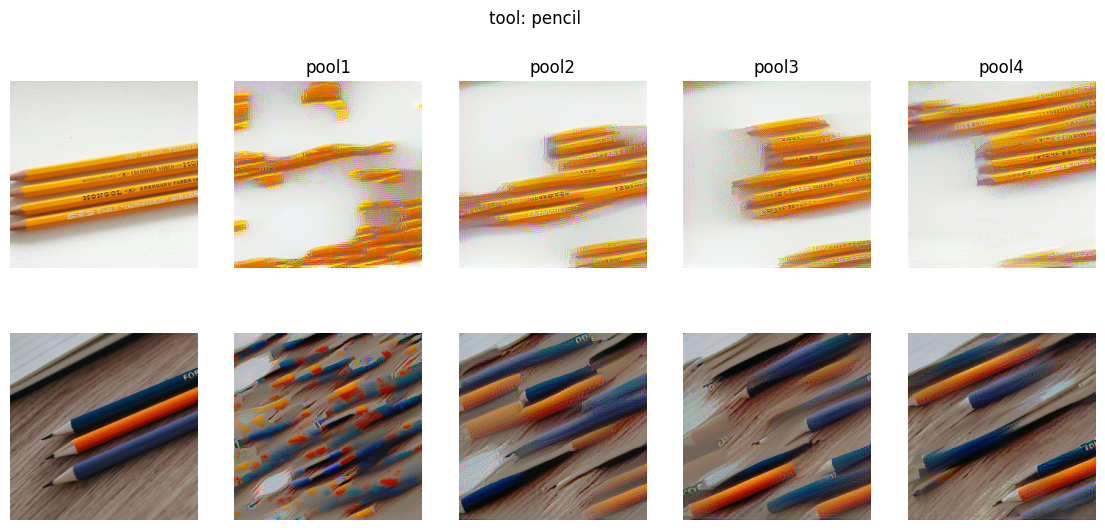

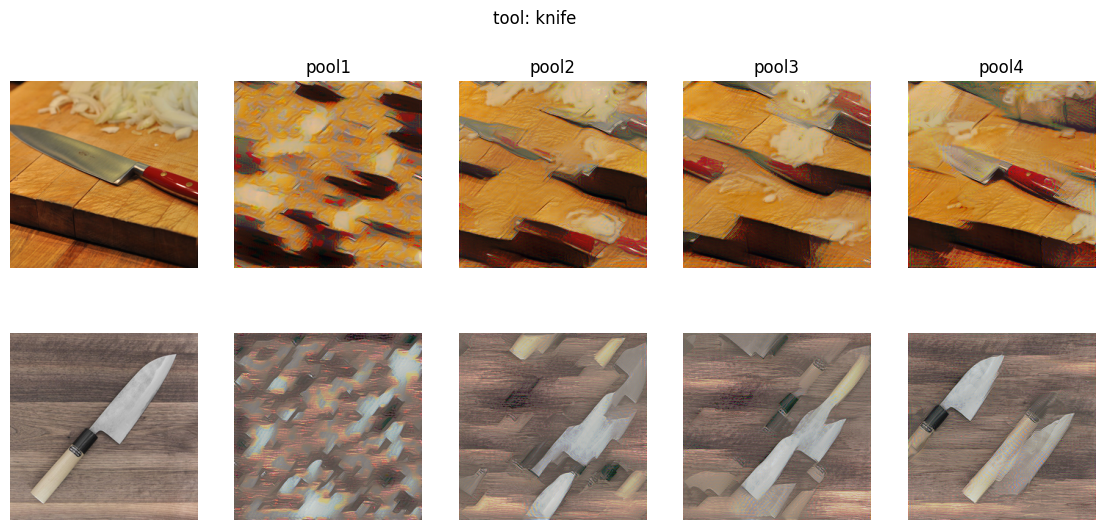

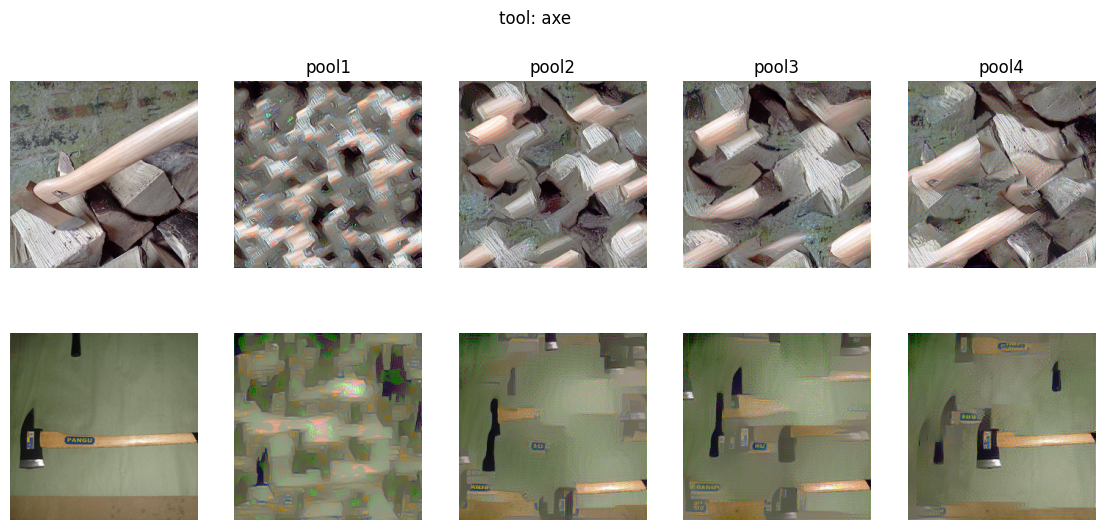

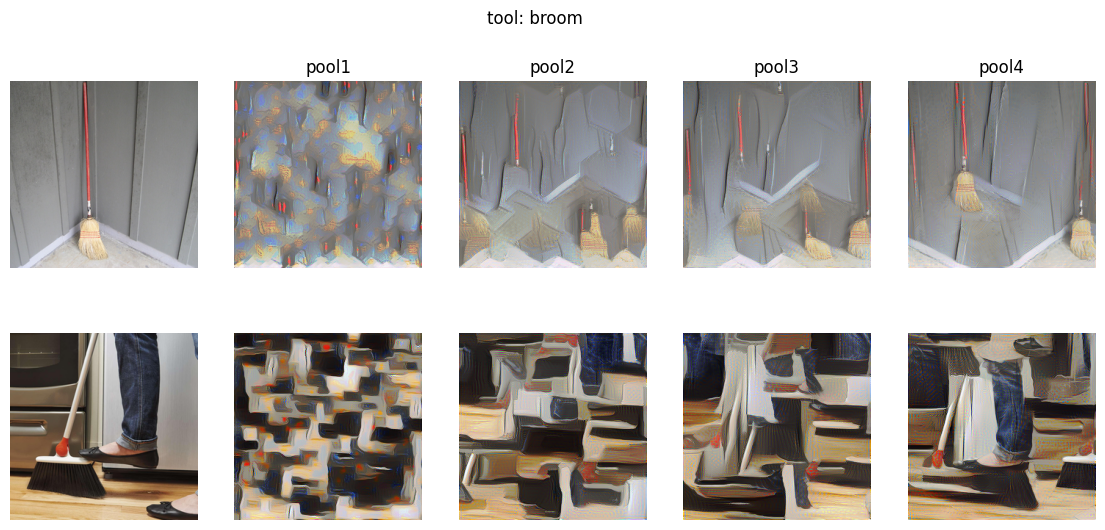

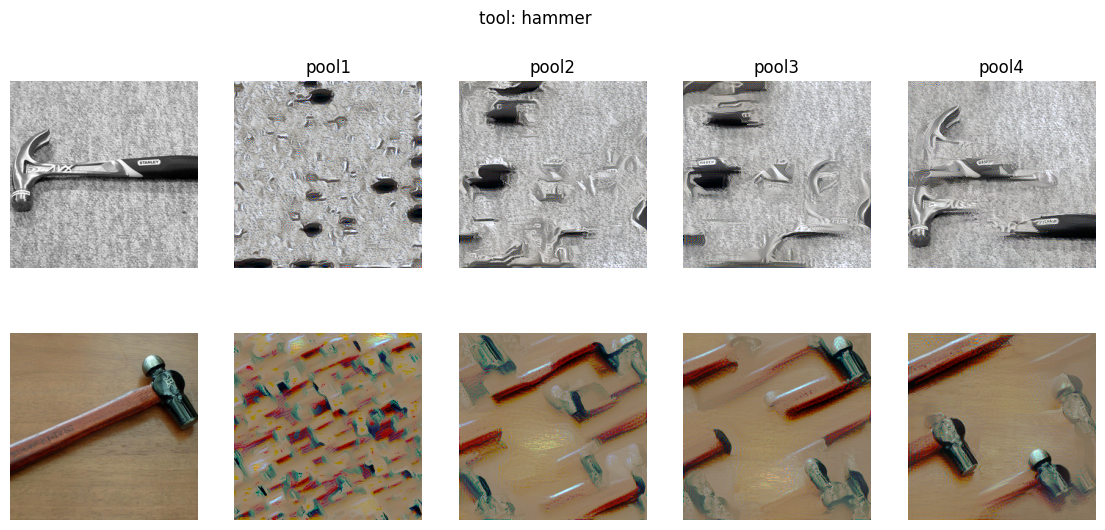

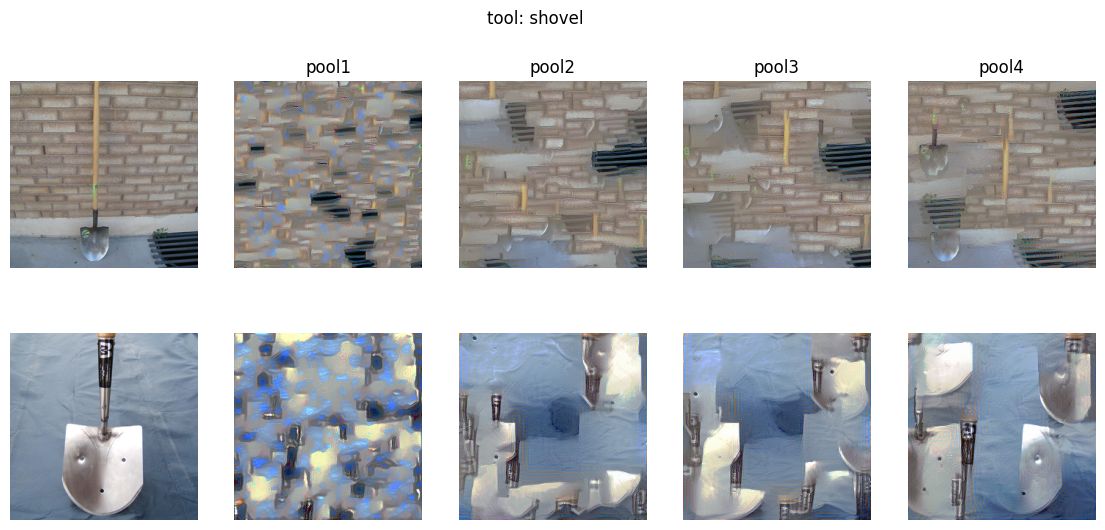

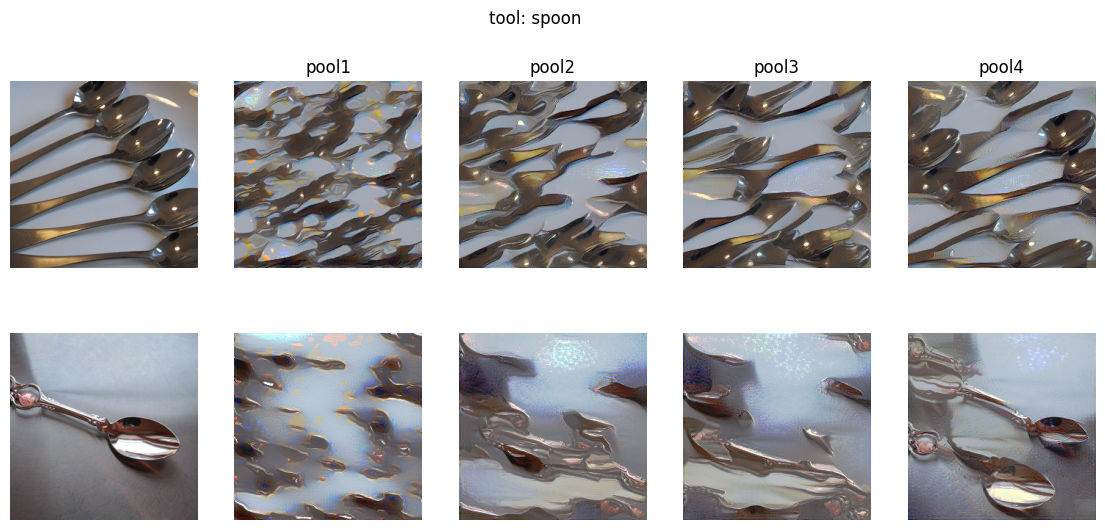

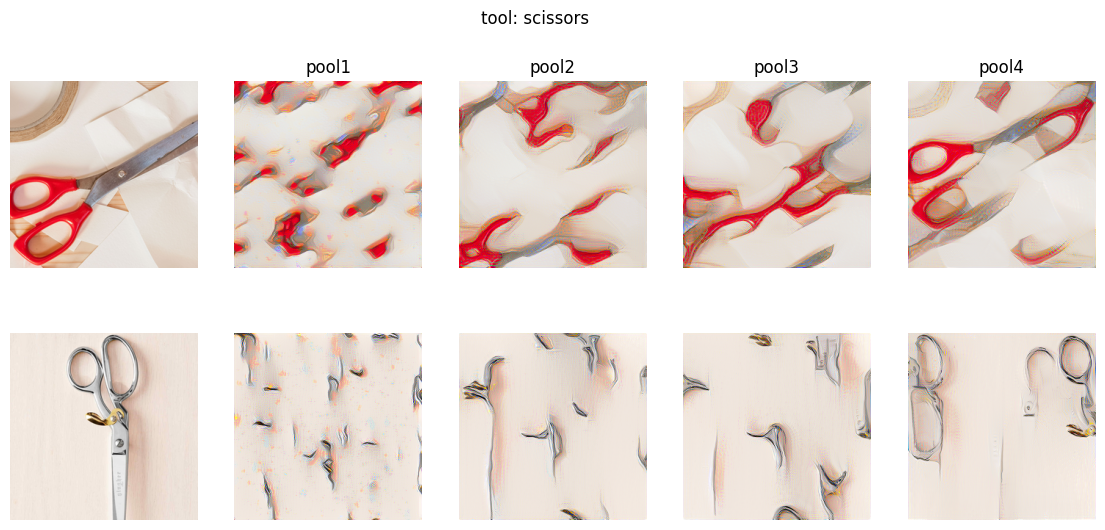

In [17]:
# sname = 'fruit'
# sname = 'insect'
# sname = 'vehicle'
sname = 'tool'
# sname = 'dessert'
bnames = info['sinfo'][sname]['basic_names']

ims_plot = np.arange(2)
n_rows = len(ims_plot)

for bi, bname in enumerate(bnames):
    
    plt.figure(figsize=(14,6))
    pi=0;

    for ii in ims_plot:
        
        name = tfiles[bname][ii].split('.jpg')[0]

        out_dir = os.path.join(stim_path, name)
        target_image_filename = os.path.join(out_dir, 'orig.png')

        im = PIL.Image.open(target_image_filename)

        pi+=1
        plt.subplot(n_rows, len(layers)+1, pi)
        plt.imshow(im)
        plt.axis('off')
        # if ii==0:
        #     plt.title('orig')

        for ll in range(n_layers):

            scrambled_image_filename = os.path.join(out_dir, \
                                                'scramble_upto_%s.png'%(layers[ll]))
            im = PIL.Image.open(scrambled_image_filename)

            pi+=1
            plt.subplot(n_rows, len(layers)+1, pi)
            plt.imshow(im)
            plt.axis('off')
            if ii==0:
                plt.title(layers[ll])

    plt.suptitle('%s: %s'%(sname, bname))

#### plotting losses

0.9754159450531006 7223509.0


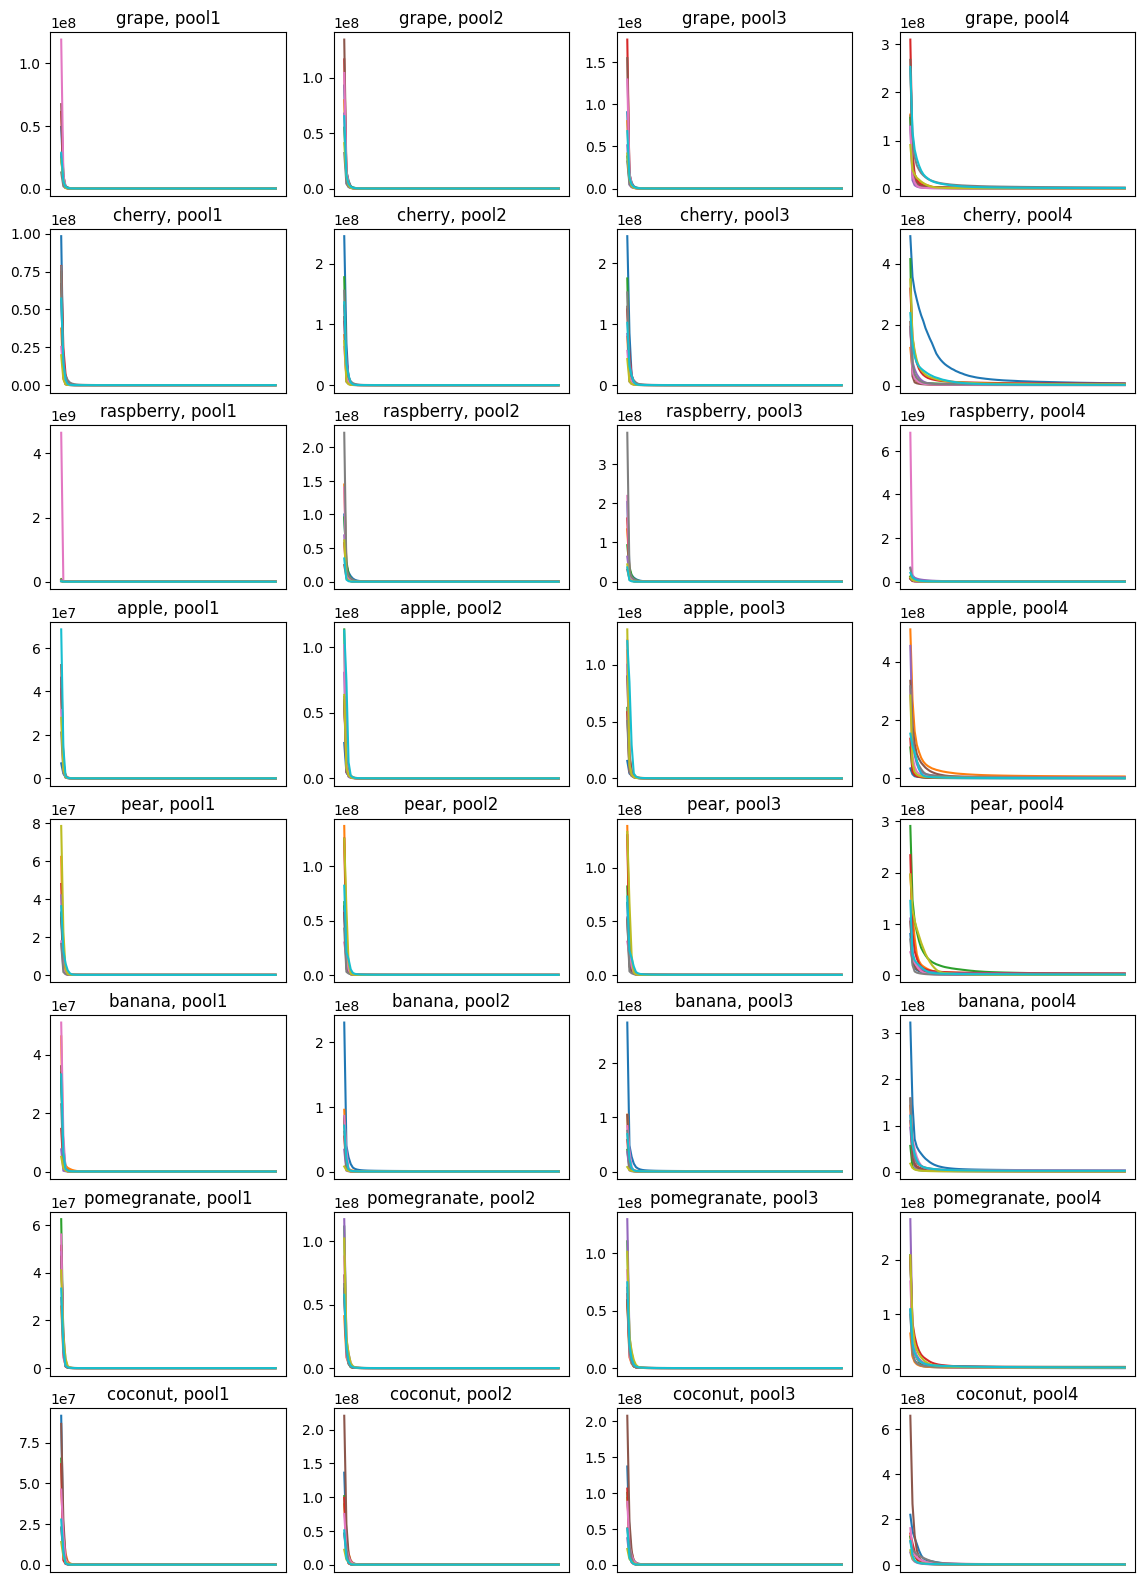

In [41]:
# sname = 'vehicle'
# sname = 'tool'
# sname = 'dessert'
sname = 'fruit'
bnames = info['sinfo'][sname]['basic_names']

plt.figure(figsize=(14,20))

pi=0;
ims_plot = np.arange(10)

n_rows = len(bnames)

final_val_min = 100000
final_val_max = -10

for bi, bname in enumerate(bnames):
    
    for ll in range(n_layers):
        
        pi+=1
        plt.subplot(n_rows, len(layers), pi)

        for ii in ims_plot:

            name = tfiles[bname][ii].split('.jpg')[0]
            out_dir = os.path.join(stim_path, name)
            loss_filename = os.path.join(out_dir,'loss_scramble_upto_%s.csv'%(layers[ll]))

            l = np.array(pd.read_csv(loss_filename, index_col=0))

            final_val_min = np.min([final_val_min, l[-1]])
            final_val_max = np.max([final_val_max, l[-1]])
            
            plt.plot(l)
            
        plt.xticks([])

        plt.title('%s, %s'%(bname, layers[ll]))
        
print(final_val_min, final_val_max)
